# Julia Basic usage. 

In [1]:
dic_ = Dict(:a => 1 )

Dict{Symbol,Int64} with 1 entry:
  :a => 1

In [2]:
dic_[:a]

1

In [3]:
# String interpolation 
x = 1 
"x = $x"

"x = 1"

In [4]:
# if specifies format
using Printf
@printf("%0.2f", pi)

3.14

In [5]:
# range 
for i in 1:10
    print(i, ",")
end

1,2,3,4,5,6,7,8,9,10,

In [6]:
# step size

for i in 1:2:10
    print(i,",")
end

1,3,5,7,9,

# Mathematical notation 

In [7]:
# mathematical notation
# https://docs.julialang.org/en/v1/manual/unicode-input/
pi + π

6.283185307179586

In [8]:
ϵ = 1

1

In [9]:
2π

6.283185307179586

In [10]:
x = 2
22x 

44

In [11]:
a = 1 
b = 2 
a*b

2

#  display calculation result 

In [12]:
using Pkg; 
Pkg.add("PyPlot")
Pkg.add("StatsBase")
Pkg.precompile()

   Updating registry at `/opt/julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
Precompiling project...


1×50 LinearAlgebra.Transpose{Float64,Array{Float64,1}}:
 0.236033  0.346517  0.312707  0.00790928  …  0.524975  0.241591  0.884837

sum(r) = 23.134209483707394


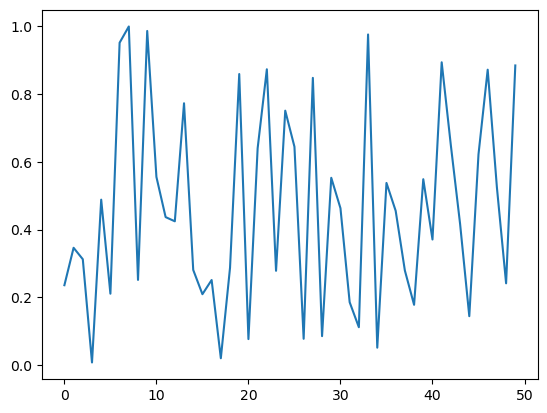

[0.23603334566204692 0.34651701419196046 0.3127069683360675 0.00790928339056074 0.4886128300795012 0.21096820215853596 0.951916339835734 0.9999046588986136 0.25166218303197185 0.9866663668987996 0.5557510873245723 0.43710797460962514 0.42471785049513144 0.773223048457377 0.2811902322857298 0.20947237319807077 0.25137920979222494 0.02037486871266725 0.2877015122756894 0.859512136087661 0.07695088688120899 0.6403962459899388 0.8735441302706854 0.27858242002877853 0.7513126327861701 0.6448833539420931 0.07782644396003469 0.8481854810000327 0.0856351682044918 0.5532055454580578 0.46335024592359875 0.18582130997265378 0.11198087695816716 0.976311881619359 0.051614620674327094 0.5380295812064833 0.4556920516275036 0.2793951106725605 0.17824610354168602 0.5489828719625274 0.37097066286146885 0.8941659192657594 0.6480537482231894 0.4170393538841062 0.14456554241360564 0.6224031828206811 0.8723344353741975 0.5249746566167794 0.24159060827129641 0.8848369255734128]

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f273212de80>

In [13]:
include("display.jl")

In [16]:
# suppress output by semicolon
r=rand(100,100);

# allargmin function

In [17]:
function allargmin(a)
    m = minimum(a)
    filter(i -> a[i] == m, eachindex(a))
end

allargmin (generic function with 1 method)

In [18]:
allargmin([1,2,3,1,2,3])

2-element Array{Int64,1}:
 1
 4

In [20]:
randargmin1(a) = rand(allargmin(a))

randargmin1 (generic function with 1 method)

In [22]:
using StatsBase
x = [1,2,3,1,2,3,1,1]
countmap([randargmin1(x) for i in 1:10^6 ])

Dict{Int64,Int64} with 4 entries:
  7 => 250873
  4 => 249296
  8 => 250246
  1 => 249585

# Pipe operator

In [19]:
[1, 4, 3, 4, 3] |> sort |> unique

3-element Array{Int64,1}:
 1
 3
 4

# Complex number and julia set 

In [23]:
function juliapoint(z, c)
    for n in 1:255
        z = z^2 + c 
        abs2(z) > 4 && return n
    end 
    return 256
end

juliapoint (generic function with 1 method)

In [24]:
using PyPlot

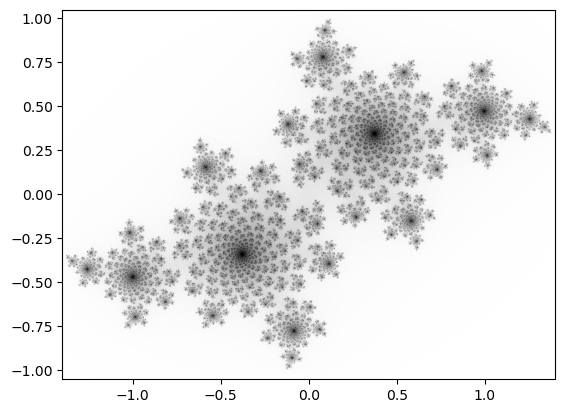

PyObject <matplotlib.image.AxesImage object at 0x7f2731e105e0>

In [41]:
xs = -1.4:0.002:1.4
ys = -1.05:0.002:1.05
c = -0.4 + 0.6im
res = [juliapoint(complex(x,y),c ) for y in ys, x in xs] ;
imshow(res, extent=[extrema(xs)..., extrema(ys)...], cmap="gray_r")

In [51]:
size(res) |> display 
length(res) |> display

(1051, 1401)

1472451

# Julia capsulation, polyphormism 
- 非オブジェクト指向言語Juliaで書くオブジェクト指向  
https://muuuminsan.hatenablog.com/entry/2020/10/23/072527

## julia capsulation 

In [52]:
struct Point2D
    _arr #公開したくない変数。配列の1番目にxを、配列の2番目にyを持っている。
end

#get_x, get_yは詳細を覆い隠している
function get_x(pt)
    return pt._arr[1]
end

function get_y(pt)
    return pt._arr[2]
end

function to_string(pt)
    #仮に内部データの持ち方を変えてもこの関数は影響を受けない
    x = string(get_x(pt))
    y = string(get_y(pt))
    return "(" * x * ", " * y * ")"
end

pt2D = Point2D([1, 2])
println(to_string(pt2D)) # (1, 2) と表示される。

(1, 2)


## julia polyphormism 

In [55]:
struct DeluxPoint2D
    _arr
end

function to_string(pt::DeluxPoint2D)
    x = string(get_x(pt))
    y = string(get_y(pt))
    return "*(" * x * ", " * y * ")*"
end

deluxPt2D = DeluxPoint2D([1, 2])
println(to_string(deluxPt2D)) # *(1, 2)* と表示される。おしゃれな耳あてがついている。

*(1, 2)*


##  julia polyphormism 2

In [62]:
struct DeluxPoint2D_ver2
    _pt2D::Point2D #内部でPoint2Dを保持する
end

function DeluxPoint2D_ver2(arr)
    DeluxPoint2D_ver2(Point2D(arr))
end

#Point2Dと同じでいい仕事は全部Point2Dに丸投げ
function get_x(pt::DeluxPoint2D_ver2)
    return get_x(pt._pt2D)
end

function get_y(pt::DeluxPoint2D_ver2)
    return get_y(pt._pt2D)
end

#変えたい動作だけ定義する。
function to_string(pt::DeluxPoint2D_ver2)
    x = string(get_x(pt))
    y = string(get_y(pt))
    return "*(" * x * ", " * y * ")*"
end

deluxPt2D_ver2 = DeluxPoint2D_ver2([1, 2])
println(to_string(deluxPt2D_ver2)) # *(1, 2)* と表示される。

*(1, 2)*


## Multiple dispatch 

In [65]:
struct Mover
    dx
    dy
end

struct DeluxMover
    dx
    dy
end

function move(pt, mover)
    new_x = get_x(pt) + mover.dx
    new_y = get_y(pt) + mover.dy
    return Point2D([new_x, new_y])
end

function move(pt::DeluxPoint2D, mover::Mover)
    new_x = get_x(pt) + mover.dx * 1.1
    new_y = get_y(pt) + mover.dy * 1.1
    return DeluxPoint2D([new_x, new_y])
end

function move(pt::Point2D, mover::DeluxMover)
    new_x = get_x(pt) + mover.dx * 1.2
    new_y = get_y(pt) + mover.dy * 1.2
    return Point2D([new_x, new_y])
end

function move(pt::DeluxPoint2D, mover::DeluxMover)
    new_x = get_x(pt) + mover.dx * 729
    new_y = get_y(pt) + mover.dy * 729
    return DeluxPoint2D([new_x, new_y])
end

pt2D = Point2D([1, 2])
pt2D = move(pt2D, Mover(1, 1))
println(to_string(pt2D)) # (2, 3) 

deluxPt2D = DeluxPoint2D([1, 2])
deluxPt2D = move(deluxPt2D, Mover(1, 1)) #1.1倍
println(to_string(deluxPt2D)) # *(2.1, 3.1)* 

pt2D = Point2D([1, 2])
pt2D = move(pt2D, DeluxMover(1, 1)) #1.2倍
println(to_string(pt2D)) # (2.2, 3.2)

deluxPt2D = DeluxPoint2D([1, 2])
deluxPt2D = move(deluxPt2D, DeluxMover(1, 1)) #729倍
println(to_string(deluxPt2D)) # *(730, 731)*

(2, 3)
*(2.1, 3.1)*
(2.2, 3.2)
*(730, 731)*


# variadic arguments

In [74]:
# variadic arugments version
test(a,c,e) = println("$a $c $e")

args = (2,1,9)

test(args...)

2 1 9


In [75]:
# keyword arguments version
test(;a=0,c=0,e=0) = println("$a $c $e")

args = Dict(:a=>2, :c=>1, :e=>9)

test(;args...)

2 1 9


In [78]:
test_func(;a) = println("$a")
test_func(a="1")

1


# Style Guide 
- julia style guid   
https://docs.julialang.org/en/v1/manual/style-guide/
- Blue: a Style Guide for Julia  
https://github.com/invenia/BlueStyle#comments
- Documentation  
https://docs.julialang.org/en/v1/manual/documentation/  
- Functions  
https://docs.julialang.org/en/v1/manual/functions/